<h1><center>Titanic</center></h1>

In this Jupyter notebook we:

    Perform an exploratory analysis of the Titanic dataset.
    Gain data-driven insight into potential issues or findings regarding the dataset you chose.
    Map values to different scales and generate new information.
    Visualise data distributions. 
    Design a basic classification model to predict survival rates.
    Measure accuracy of the classification model.
----

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re as re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Titanic dataset
train = pd.read_csv('data/TitanicDataSet.csv', header = 0, dtype={'Age': np.float64})

## Data Description

In [4]:
train.shape

(891, 12)

There are **891** observations or **passengers** and **12** columns or **attributes** in the Titanic dataset

In [5]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Dataset Attributes:**
- PassengerId: Id of every passenger.
- Survived: This feature have value 0 and 1. 0 for not survived and 1 for survived.
- Pclass: Ticket class: Class1, Class2 and Class3.
- Name: Name of passenger.
- Sex: Gender of passenger.
- Age: Age of passenger.
- SibSp: Indication that passenger have siblings and spouse.
- Parch: Whether a passenger is alone or have family.
- Ticket: Ticket no of passenger.
- Fare: Indicating the fare.
- Cabin: The cabin of passenger.
- Embarked: The embarked category. C = Cherbourg, Q = Queenstown, S = Southampton
- Title: Initial name of passenger. **CREATED BELOW**

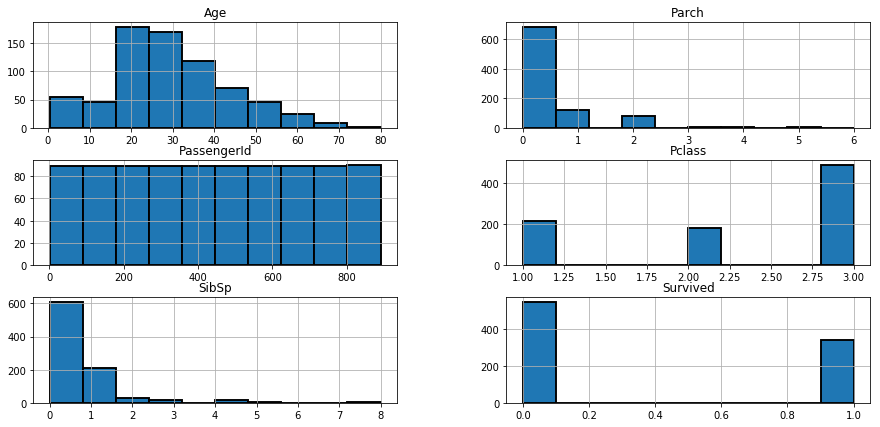

In [6]:
# generate histograms
train.drop(['Fare'], axis=1).hist(edgecolor='black', linewidth=1.9,figsize=(15,7));

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Impact of Gender

In [8]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**We can conclude that: **
- 233 female survived out of 344.
- 109 male survived out of 577. 
- The survival ratio of female is greater than that of male.

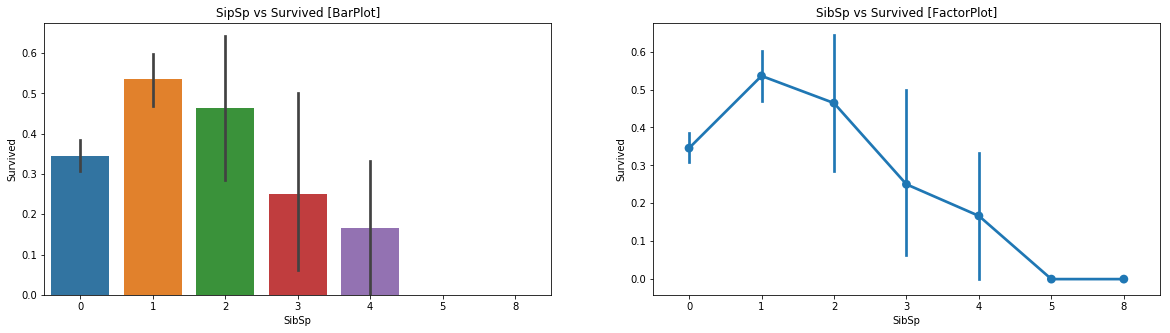

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [9]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sb.barplot('SibSp','Survived', data=train,ax=ax[0])
ax[0].set_title('SipSp vs Survived [BarPlot]')
sb.factorplot('SibSp','Survived', data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived [FactorPlot]')
plt.close(2)
plt.show()

pd.crosstab(train['SibSp'],train['Pclass']).style.background_gradient('summer')

From the above information we can conclude that:

- Passengers with no siblings -> chances of survival are about 35%
- All large families in Pclass3 with more that 4 kids died

### Titles of Passengers

In [10]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

train['Title'] = train['Name'].apply(get_title)
pd.crosstab(train['Title'], train['Sex']).T

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


### Survival ratio according to different categories

In [11]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

train['Age'][np.isnan(train['Age'])] = 1
train['Age'] = train['Age'].astype(int)

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908


In [12]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**About 62% off all passengers died!**

## Mapping Data To Numerical Values

In [13]:
# Mapping Sex
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Mapping titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)

# Mapping Embarked
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Mapping Fare
train.loc[ train['Fare'] <= 11, 'Fare'] = 0
train.loc[ train['Fare'] > 11 & (train['Fare'] <= 22), 'Fare'] = 1
train.loc[ train['Fare'] > 22 & (train['Fare'] <= 32), 'Fare']   = 2
train.loc[ train['Fare'] > 32, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

# Mapping Age in groups
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch'] #They do not offer information for this task
train = train.drop(drop_elements, axis = 1)

In [14]:
train.head(5) # Now we see that all values are numerical instead of 'words, letters'

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,1,1,0,0,1
1,1,1,0,2,2,1,3
2,1,3,0,1,0,0,2
3,1,1,0,2,2,0,3
4,0,3,1,2,0,0,1


## Building Classifier

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

/Users/daniel.reyna/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
X = train.loc[:, train.columns != 'Survived']
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X[0:], y[0:], test_size = 0.20, random_state=10)

In [17]:
# Training model
lr_model = LogisticRegression(C=0.7,random_state=10) # C is the regularisation hyperparameter
lr_model.fit(X_train,y_train.ravel())
predict = lr_model.predict(X_train)
print ('Accuracy on Training : {0:.4f}%'.format(metrics.accuracy_score(y_train,predict)*100))

predict = lr_model.predict(X_test)
print ('\nAccuracy on Testing : {0:.4f}%'.format(metrics.accuracy_score(y_test,predict)*100))

Accuracy on Training : 77.2472%

Accuracy on Testing : 83.2402%


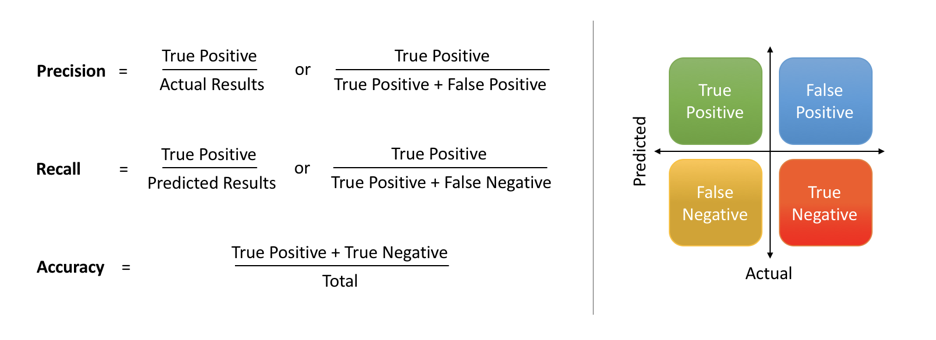

In [19]:
from IPython.display import Image
Image("data/AccPrecRec.png")

# Precision vs Recall vs Accuracy

In [20]:
# Review classification matrix
print ('\nConfusion Matrix : \n', metrics.confusion_matrix(y_test,predict))
print ('\nClassification Metrics: ',metrics.classification_report(y_test, predict))


Confusion Matrix : 
 [[103  14]
 [ 16  46]]

Classification Metrics:               precision    recall  f1-score   support

          0       0.87      0.88      0.87       117
          1       0.77      0.74      0.75        62

avg / total       0.83      0.83      0.83       179



After trainiing and testing our Logistic Regression model we obtain the following results:
- 103 (estimatedSurvived marked as survivied) + 46 (estimatedNOTSurvived marked as not survived) subjects were correctly classified.
- 16 + 14 subjects were NOT correctly classified, i.e. passengers that survived in real life were estimated as not survived (16), and 14 passangers were estimated that survived however, they died.
- On average, precision and recall are the same, 83%, this is a good sign indicating no overfitting at all.
- Different approaches can be followed in order to improve results, for instance, Neural Networks or Random Forest might yield in better classification results.


In [21]:
X_test # This is our testing portion from the original dataset. NO LABEL.

,Pclass,Sex,Age,Fare,Embarked,Title
590,3,1,2,0,0,1
131,3,1,1,0,0,1
628,3,1,1,0,0,1
195,1,0,3,2,1,2
230,1,0,2,2,0,3
646,3,1,1,0,0,1
75,3,1,1,0,0,1
586,2,1,2,2,0,1
569,3,1,1,0,0,1
287,3,1,1,0,0,1


In [22]:
y_test # Labels for every element in testing dataset. LABEL.

590    0
131    0
628    0
195    1
230    1
646    0
75     0
586    0
569    1
287    0
666    0
43     1
600    1
284    0
242    0
466    0
176    0
171    0
729    0
522    0
639    0
292    0
518    1
442    0
731    0
876    0
840    0
445    1
695    0
1      1
      ..
525    0
719    0
536    0
218    1
592    0
285    0
702    0
250    0
728    0
196    0
773    0
529    0
300    1
559    1
223    0
675    0
888    0
838    1
143    0
612    1
836    0
140    0
827    1
280    0
240    0
456    0
191    0
603    0
94     0
766    0
Name: Survived, Length: 179, dtype: int64